In [1]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=e77cfc8d810db536d96cf902692111f367629024ce2cd883c09704ed077c28cf
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Enter the data redundancy value (0-100): 10
Enter the Degradation Level (0-100): 10
Enter the Error History (0-10): 2
Chance for error is:  1.8571428571428572
Error correction method is :  1.8571428571428572
Error correction method is :  Replication
Do you want to enter another set of data (y /n ): y
Enter the data redundancy value (0-100): 90
Enter the Degradation Level (0-100): 80
Enter the Error History (0-10): 6
Chance for error is:  7.958333333333334
Error correction method is :  7.958333333333334
Error correction method is :  Masking
Do you want to enter another set of data (y /n ): n


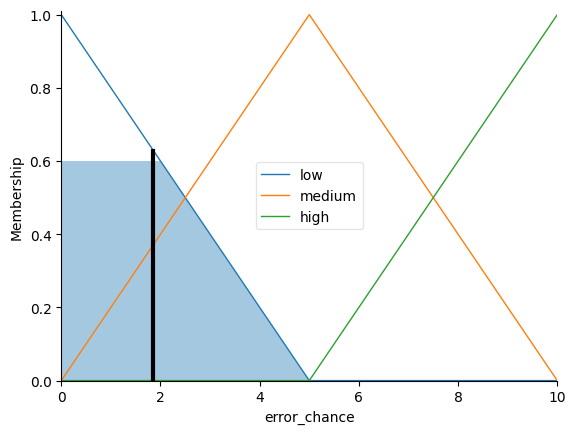

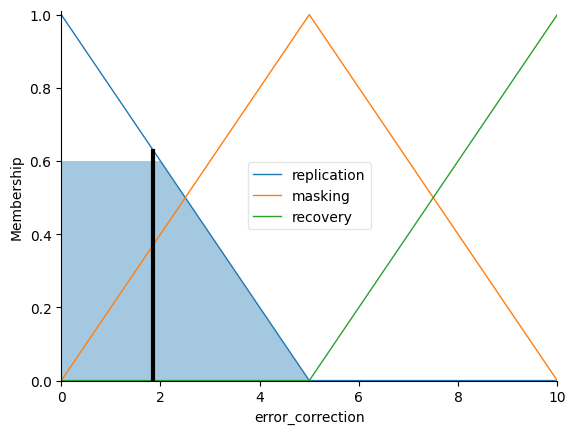

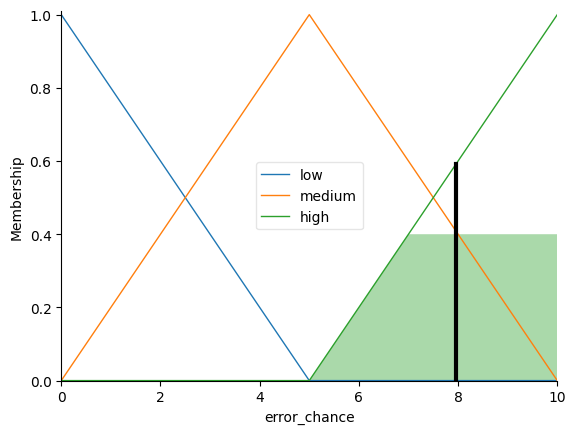

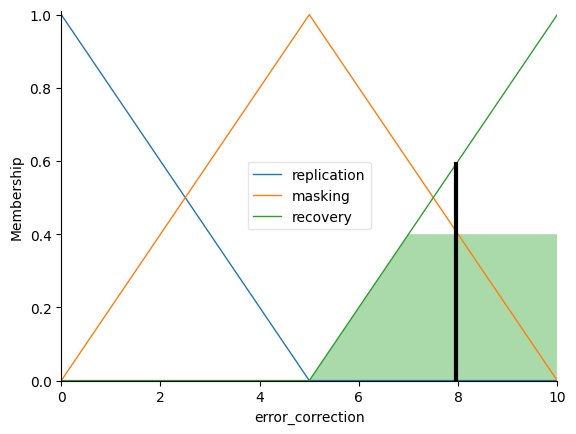

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

from skfuzzy import control as ctrl

#inputs and outputs
data_redundancy = ctrl.Antecedent(np.arange(0,101,1),'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0,101,1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0,11,1), 'error_history')
error_chance = ctrl.Consequent(np.arange(0,11,1), 'error_chance')
error_correction = ctrl.Consequent(np.arange(0,11,1), 'error_correction')

#Data_redundancy using trimf Function
data_redundancy['low'] = fuzz.trimf(data_redundancy.universe, [0, 0 , 50])
data_redundancy['medium'] = fuzz.trimf(data_redundancy.universe, [0, 50, 75])
data_redundancy['high'] = fuzz.trimf(data_redundancy.universe, [50, 75 , 100])

#Degaradation_level using trimf function
degradation_level['low'] = fuzz.trimf(degradation_level.universe, [0, 0 , 50])
degradation_level['medium'] = fuzz.trimf(degradation_level.universe, [0, 50, 75])
degradation_level['high'] = fuzz.trimf(degradation_level.universe, [50, 75 , 100])

#Error History using trimf function
error_history['low'] = fuzz.trimf(error_history.universe, [0, 0 , 5])
error_history['medium'] = fuzz.trimf(error_history.universe, [0, 5 , 10])
error_history['high'] = fuzz.trimf(error_history.universe, [5, 10 , 10])

#Calculate the chance for an error
error_chance['low'] = fuzz.trimf(error_chance.universe, [0, 0 ,5])
error_chance['medium'] = fuzz.trimf(error_chance.universe, [0, 5, 10])
error_chance['high'] = fuzz.trimf(error_chance.universe, [5, 10, 10])

#Error correction methods
error_correction['replication'] = fuzz.trimf(error_correction.universe,[0,0,5])
error_correction['masking'] = fuzz.trimf(error_correction.universe,[0,5,10])
error_correction['recovery'] = fuzz.trimf(error_correction.universe,[5,10,10])


#Rules for detect the chance for an error
rule1 = ctrl.Rule(antecedent=((data_redundancy['low'] & degradation_level['high'] & error_history['high'])),consequent = (error_chance['high'] ))
rule2 = ctrl.Rule(antecedent=((data_redundancy['low'] & degradation_level['high'] & error_history['medium'])), consequent =(error_chance['medium']))
rule3 = ctrl.Rule(antecedent=((data_redundancy['low'] & degradation_level['high'] & error_history['low'])),consequent = (error_chance['low']))
rule4 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['medium'] & error_history['high'])), consequent = (error_chance['medium']))
rule5 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['medium'] & error_history['medium'])),consequent = (error_chance['low']))
rule6 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['medium'] & error_history['low'])),consequent = (error_chance['low']))
rule7 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['low'] & error_history['high'])),consequent = (error_chance['low']))
rule8 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['low'] & error_history['medium'])),consequent = (error_chance['low']))
rule9 = ctrl.Rule(antecedent =((data_redundancy['low'] & degradation_level['low'] & error_history['low'])), consequent = (error_chance['low']))
rule10 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['high'] & error_history['high'])),consequent = (error_chance['high']))
rule11 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['high'] & error_history['medium'])), consequent = (error_chance['high']))
rule12 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['high'] & error_history['low'])),consequent = (error_chance['medium']))
rule13 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['medium'] & error_history['high'])), consequent = (error_chance['medium']))
rule14 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['medium'] & error_history['medium'])),consequent = (error_chance['low']))
rule15 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['medium'] & error_history['low'])),consequent = (error_chance['low']))
rule16 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['low'] & error_history['high'])),consequent = (error_chance['medium']))
rule17 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['low'] & error_history['medium'])),consequent = (error_chance['low']))
rule18 = ctrl.Rule(antecedent =((data_redundancy['medium'] & degradation_level['low'] & error_history['low'])), consequent = (error_chance['low']))
rule19 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['high'] & error_history['high'])),consequent = (error_chance['high']))
rule20 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['high'] & error_history['medium'])), consequent = (error_chance['high']))
rule21 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['high'] & error_history['low'])), consequent =( error_chance['high']))
rule22 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['medium'] & error_history['high'])),consequent = (error_chance['high']))
rule23 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['medium'] & error_history['medium'])),consequent = (error_chance['medium']))
rule24 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['medium'] & error_history['low'])),consequent = (error_chance['low']))
rule25 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['low'] & error_history['high'])),consequent = (error_chance['medium']))
rule26 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['low'] & error_history['medium'])),consequent = (error_chance['low']))
rule27 = ctrl.Rule(antecedent =((data_redundancy['high'] & degradation_level['low'] & error_history['low'])), consequent = (error_chance['low']))
rule28 =  ctrl.Rule(antecedent= error_chance['low'] ,consequent = error_correction['replication'])
rule29 = ctrl.Rule( antecedent= error_chance['medium'],consequent = error_correction['masking'])
rule30 = ctrl.Rule(antecedent= error_chance['high'],consequent = error_correction['recovery'])

# Implement the control class
error_detection = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,rule28, rule29, rule30])
error_detect = ctrl.ControlSystemSimulation(error_detection)

def validate_input(prompt, min , max):
    while True:
        try:
            val = float(input(prompt))
            if min <= val <= max :
                return val
            else:
                print(f"Please enter a value between {min} and {max}.")
        except ValueError as e:
            print(f"Error: {e}")
            print("Please enter a valid number")

def user_interface():
  continue_process = True
  while continue_process:
      user_data_redundancy = validate_input("Enter the data redundancy value (0-100): ", 0 ,100)
      user_degradation_level = validate_input("Enter the Degradation Level (0-100): ", 0 ,100)
      user_error_history = validate_input("Enter the Error History (0-10): ", 0 ,10)


      error_detect.input['data_redundancy'] = user_data_redundancy
      error_detect.input['degradation_level'] = user_degradation_level
      error_detect.input['error_history'] = user_error_history

      error_detect.compute()

      print("Chance for error is: ", error_detect.output['error_chance'])
      print("Error correction method is : " ,error_detect.output['error_correction'])
      error_correction_output = error_detect.output['error_correction']

      if (error_correction_output > 0 and error_correction_output <= 5 ):
          correction_method = 'Replication'
      elif(error_correction_output > 5 and error_correction_output <= 8):
          correction_method = 'Masking'
      elif (error_correction_output > 8 and error_correction_output <= 10):
          correction_method = 'Recovery'
      else:
          correction_method = 'Error in message'

      print("Error correction method is : " , correction_method)


      error_chance.view(sim = error_detect)
      error_correction.view(sim = error_detect)

      continue_to_proceed = input("Do you want to enter another set of data (y /n ): ").lower()
      if continue_to_proceed == 'y':
        continue_process = True
      elif continue_to_proceed == 'n':
        continue_process = False
      else:
        print('Enter correct input (y / n)')

user_interface()
